In [1]:
import pandas as pd
import numpy as np
import numpy as py
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import collections

In [2]:
dataset  = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [3]:
#The sentiment analysis of the headlines according to Vader
import sklearn
import nltk
import json
import spacy
from sklearn import metrics
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader_model = SentimentIntensityAnalyzer()
nlp = spacy.load('en')

def sentiment_classification(scores):
    compound_score = scores['compound']
    if compound_score >= 0.05:
        sentiment = 'positive'
    elif compound_score <= - 0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return sentiment

In [4]:
sentences = []
for i in range(0, len(dataset)):
    sentences.append(dataset['headline'][i])

In [5]:
system_output= []
for sent in sentences[:10]:
    scores = vader_model.polarity_scores(sent)
    system_output.append(sentiment_classification(scores))
    print()
    print('Input sentence:', sent)
    print('Vader output:', scores)


Input sentence: former versace store clerk sues over secret 'black code' for minority shoppers
Vader output: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Input sentence: the 'roseanne' revival catches up to our thorny political mood, for better and worse
Vader output: {'neg': 0.272, 'neu': 0.576, 'pos': 0.152, 'compound': -0.3182}

Input sentence: mom starting to fear son's web series closest thing she will have to grandchild
Vader output: {'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'compound': -0.4939}

Input sentence: boehner just wants wife to listen, not come up with alternative debt-reduction ideas
Vader output: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Input sentence: j.k. rowling wishes snape happy birthday in the most magical way
Vader output: {'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'compound': 0.6486}

Input sentence: advancing the world's women
Vader output: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Input sentence: the fascinating case for e

In [6]:
num_huffington = 0
num_onion = 0
num_sarcastic = 0
num_non_sarcastic = 0
for i in range(0, len(dataset)):
    if "huffingtonpost" in dataset['article_link'][i]:
        num_huffington+=1
    if "theonion" in dataset['article_link'][i]:
        num_onion+=1
    if dataset['is_sarcastic'][i] == 1:
        num_sarcastic+=1
    else:
        num_non_sarcastic+=1


In [7]:
num_huffington

14985

In [8]:
num_onion

11725

In [9]:
num_sarcastic

11724

In [10]:
num_non_sarcastic

14985

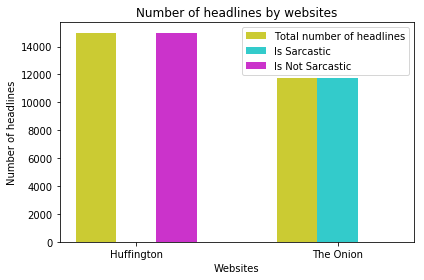

<Figure size 432x288 with 0 Axes>

In [12]:
# data to plot
n_groups = 2
group_news = (num_huffington, num_onion)
group_sarcasm  = (len(dataset)-num_sarcastic-num_non_sarcastic, num_sarcastic)
group_non_sarcasm = (num_non_sarcastic, len(dataset)-num_sarcastic-num_non_sarcastic)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8
 
rects1 = plt.bar(index, group_news, bar_width,
alpha=opacity,
color='y',
label='Total number of headlines')
 
rects2 = plt.bar(index + bar_width, group_sarcasm , bar_width,
alpha=opacity,
color='c',
label='Is Sarcastic')


rects3 = plt.bar(index + 2*bar_width, group_non_sarcasm , bar_width,
alpha=opacity,
color='m',
label='Is Not Sarcastic')

 
plt.xlabel('Websites')
plt.ylabel('Number of headlines')
plt.title('Number of headlines by websites')
plt.xticks(index + bar_width, ('Huffington', 'The Onion'))
plt.legend()
 
plt.tight_layout()
plt.show()
plt.savefig('Sarcasm_news_data1')

In [13]:
import re
import nltk
import spacy
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
corpus = []
wordcount = {}
nlp = spacy.load('en')
for i, headline in enumerate(dataset['headline']):  # 26709 is the numbers of headlines in the dataset
    doc = nlp(headline)
    review = dataset['headline'][i] 
    tokens = [word.lemma_.lower() for word in doc
        if not (word.is_stop | word.is_punct | word.is_digit)]
    for word in tokens:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
    review = " ".join(tokens)
    corpus.append(review) # add it to the corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\İREM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


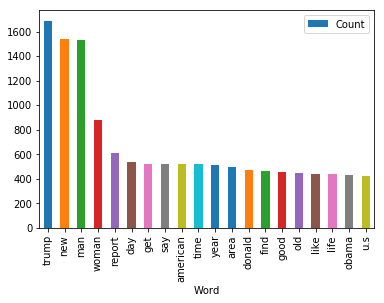

In [14]:
word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(20)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')